In [17]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import label


#%pip install opencv-python # Required to import cv2 !!!
import cv2

from IPython.display import display, Latex, Math

import os
import time

plt.rcParams['figure.dpi'] = 250

# Task 1

In [18]:
A_1 = np.array([
    [1, 0],
    [0, 1]
]) 

A_2 = np.array([
    [1, 2],
    [1, 1], 
    [1, 2]
])

A_3 = np.array([
    [2, 1, 1],
    [2, 1, 1], 
    [1, 1, 2]
])

A_4 = np.array([
    [2, 1, 0],
    [1, 2, 3], 
    [0, 3, 3]
])

In [19]:
def NMF(V, d, delta = 1e-9, maxiter = 1000, seed = 0, store_norms = False):
    """
    ((Skriv en forklaring på hva funksjonen gjør her))
    input:
        V: (m,n) input array
        d: integer, Number of components we want to decompose V into
        delta, float, small number for safe division
        maxiter: integer, maximum number of iterations
        seed: integer, random seed
    output:
        W: (m,d) array
        H: (d,n) array
    """

    if seed != 0:
        np.random.seed(seed)
    
    norms = np.zeros(maxiter)

    #Initialize W and H to random numbers between 0 and 1 with the correct shape
    m = np.shape(V)[0]
    n = np.shape(V)[1]
    W_0 = np.random.uniform(0.0, 1.0, m*d).reshape(m,d)
    H_0 = np.random.uniform(0.0, 1.0, d*n).reshape(d,n)

    #Scale the matrixes
    W_0 = np.sqrt(np.mean(V)/d)*W_0
    H_0 = np.sqrt(np.mean(V)/d)*H_0
    #print("W_0 ",W_0)
    #print("H_0 ",H_0)
    
    W_next = np.copy(W_0)
    W_prev = np.copy(W_0)
    H_next = np.copy(H_0)
    H_prev = np.copy(H_0)
    
    for k in range(maxiter):
        #gir samme resultat
        #H_temp = np.divide(np.multiply(H_prev,np.dot(W_prev.T,V)),np.linalg.multi_dot([W_prev.T,W_prev,H_prev])+delta)
        #W_temp = np.divide(np.multiply(W_prev,np.dot(V,H_next.T)),np.linalg.multi_dot([W_prev,H_next,H_next.T])+delta)

        H_next = (H_prev * np.dot(W_prev.T,V)) / (np.linalg.multi_dot([W_prev.T,W_prev,H_prev])+delta)
        W_next = (W_prev * np.dot(V,H_next.T)) / (np.linalg.multi_dot([W_prev,H_next,H_next.T])+delta)
        H_prev = np.copy(H_next)
        W_prev = np.copy(W_next)
        norms[k] = np.linalg.norm(V- np.dot(W_next, H_next), 'fro')

    if store_norms == False:
        return W_next, H_next
    else:
        return W_next, H_next, norms

## 1d) 

In [20]:
def test_1d():
    W_next_A_1, H_next_A_1 = NMF(A_1, 1, delta = 1e-9, maxiter = 1000, seed = 0)
    W_next_A_2, H_next_A_2 = NMF(A_2, 1, delta = 1e-9, maxiter = 1000, seed = 0)    

    print("Matrix A_1:")
    print(f"W: \n {W_next_A_1}")
    print(f"H: \n {H_next_A_1}")
    print(f"WH: \n {np.dot(W_next_A_1,H_next_A_1)}")
    print(f"Norm: {np.linalg.norm(A_1- np.dot(W_next_A_1,H_next_A_1), 'fro')}") 

    print("Matrix A_2:")
    print(f"W: \n {W_next_A_2}")
    print(f"H: \n {H_next_A_2}")
    print(f"WH: \n {np.dot(W_next_A_2,H_next_A_2)}")
    print(f"Norm: {np.linalg.norm(A_2- np.dot(W_next_A_2,H_next_A_2), 'fro')}")

test_1d()

Matrix A_1:
W: 
 [[0.70564039]
 [0.08072797]]
H: 
 [[1.39884403 0.16003313]]
WH: 
 [[0.98708085 0.11292584]
 [0.11292584 0.01291915]]
Norm: 1.0
Matrix A_2:
W: 
 [[1.04418134]
 [0.63728194]
 [1.04418134]]
H: 
 [[1.05369154 1.86101986]]
WH: 
 [[1.10024505 1.94324222]
 [0.67149858 1.18599434]
 [1.10024505 1.94324222]]
Norm: 0.41115460006510873


## 1e

In [21]:
def test_1e():
    W_next_A_1, H_next_A_1 = NMF(A_1, 2, delta = 1e-9, maxiter = 1000, seed = 0)
    W_next_A_2, H_next_A_2 = NMF(A_2, 2, delta = 1e-9, maxiter = 1000, seed = 0)    

    print("Matrix A_1:")
    print(f"W: \n {W_next_A_1}")
    print(f"H: \n {H_next_A_1}")
    print(f"WH: \n {np.dot(W_next_A_1,H_next_A_1)}")
    print(f"Norm: {np.linalg.norm(A_1- np.dot(W_next_A_1,H_next_A_1), 'fro')}") 

    print("Matrix A_2:")
    print(f"W: \n {W_next_A_2}")
    print(f"H: \n {H_next_A_2}")
    print(f"WH: \n {np.dot(W_next_A_2,H_next_A_2)}")
    print(f"Norm: {np.linalg.norm(A_2- np.dot(W_next_A_2,H_next_A_2), 'fro')}")

test_1e()

Matrix A_1:
W: 
 [[0.54181052 0.        ]
 [0.         0.40225641]]
H: 
 [[1.84566368 0.        ]
 [0.         2.48597655]]
WH: 
 [[1. 0.]
 [0. 1.]]
Norm: 6.748102354869831e-10
Matrix A_2:
W: 
 [[0.37207399 0.51883702]
 [0.18137859 0.55724642]
 [0.37207399 0.51883702]]
H: 
 [[0.3392128  5.26053812]
 [1.68412758 0.08228136]]
WH: 
 [[1. 2.]
 [1. 1.]
 [1. 2.]]
Norm: 9.551156844556116e-10


# Task 2

In [22]:
# Number of faces to keep in final array
N = 500

In [23]:
def load_images(N):
    """
    Loads images from cryptopunk dataset. The loading order is deterministic,
    so for a certain N the exact same images will be loaded. 
    Input:
        N, integer, number of images to load
    Output:
        faces, (24,24,4,N) numpy array containing images
    """

    # Allocate array to store images
    faces = np.zeros((24,24,4,N))

    # Iteration variable
    i = 0

    # Iterate over folders
    for subdir, dirs, files in os.walk('./imgs'):

        # Iterate over files
        for file in files:

            # Filepath to load from
            filepath = subdir + os.sep + file

            # Make sure that the file is a .png
            if filepath[-3:] == 'png':

                # Load the image
                im = cv2.imread(filepath, cv2.IMREAD_UNCHANGED)

                # Convert it to RGBA and rescale pixels
                faces[:,:,:,i] = cv2.cvtColor(im, cv2.COLOR_BGRA2RGBA)/255.0

                i+=1
            if i == N:
                break
    return faces

In [24]:
# Code for plotting images
def plotimgs(imgs, nplot = 8, rescale = False, filename = None):
    """
    Plots nplot*nplot images on an nplot x nplot grid. 
    Saves to given filename if filename is given
    Can also rescale the RGB channels
    input:
        imgs: (24,24,4,N) or (24,24,3,N) array containing images, where N > nplot**2
        nplot: integer, nplot**2 images will be plotted
        rescale: bool
        filename: string, figure will be saved to this location. Should end with ".png".
    """
    # We will change some of the parameters of matplotlib, so we store the initial ones
    oldparams = plt.rcParams['figure.figsize']

    # New params to make better plot. There definitely exists better ways of doing this
    plt.rcParams['figure.figsize'] = (16, 16)

    # Initialize subplots
    fig, axes = plt.subplots(nplot,nplot)

    # Set background color
    plt.gcf().set_facecolor("lightgray")

    # Iterate over images
    for idx in range(nplot**2):
        
        # Indices
        i = idx//nplot; j = idx%nplot

        # Remove axis
        axes[i,j].axis('off')

        # Rescale RGB channels by dividing my maximal value
        if rescale:
            scaled_img = np.copy(imgs[:,:,:,idx])
            scaled_img[:,:,:3] = scaled_img[:,:,:3]/np.max(scaled_img[:,:,:3])
            axes[i,j].imshow(scaled_img)
        else:
            axes[i,j].imshow(imgs[:,:,:,idx])
    
    # Tight layout so images will appear closer together
    plt.tight_layout()

    # Save if filename is given
    if filename is not None:
        plt.savefig(filename)

    plt.show()

    # Return to old parameters
    plt.rcParams['figure.figsize'] = oldparams

## 2a

(24, 24, 4, 500)


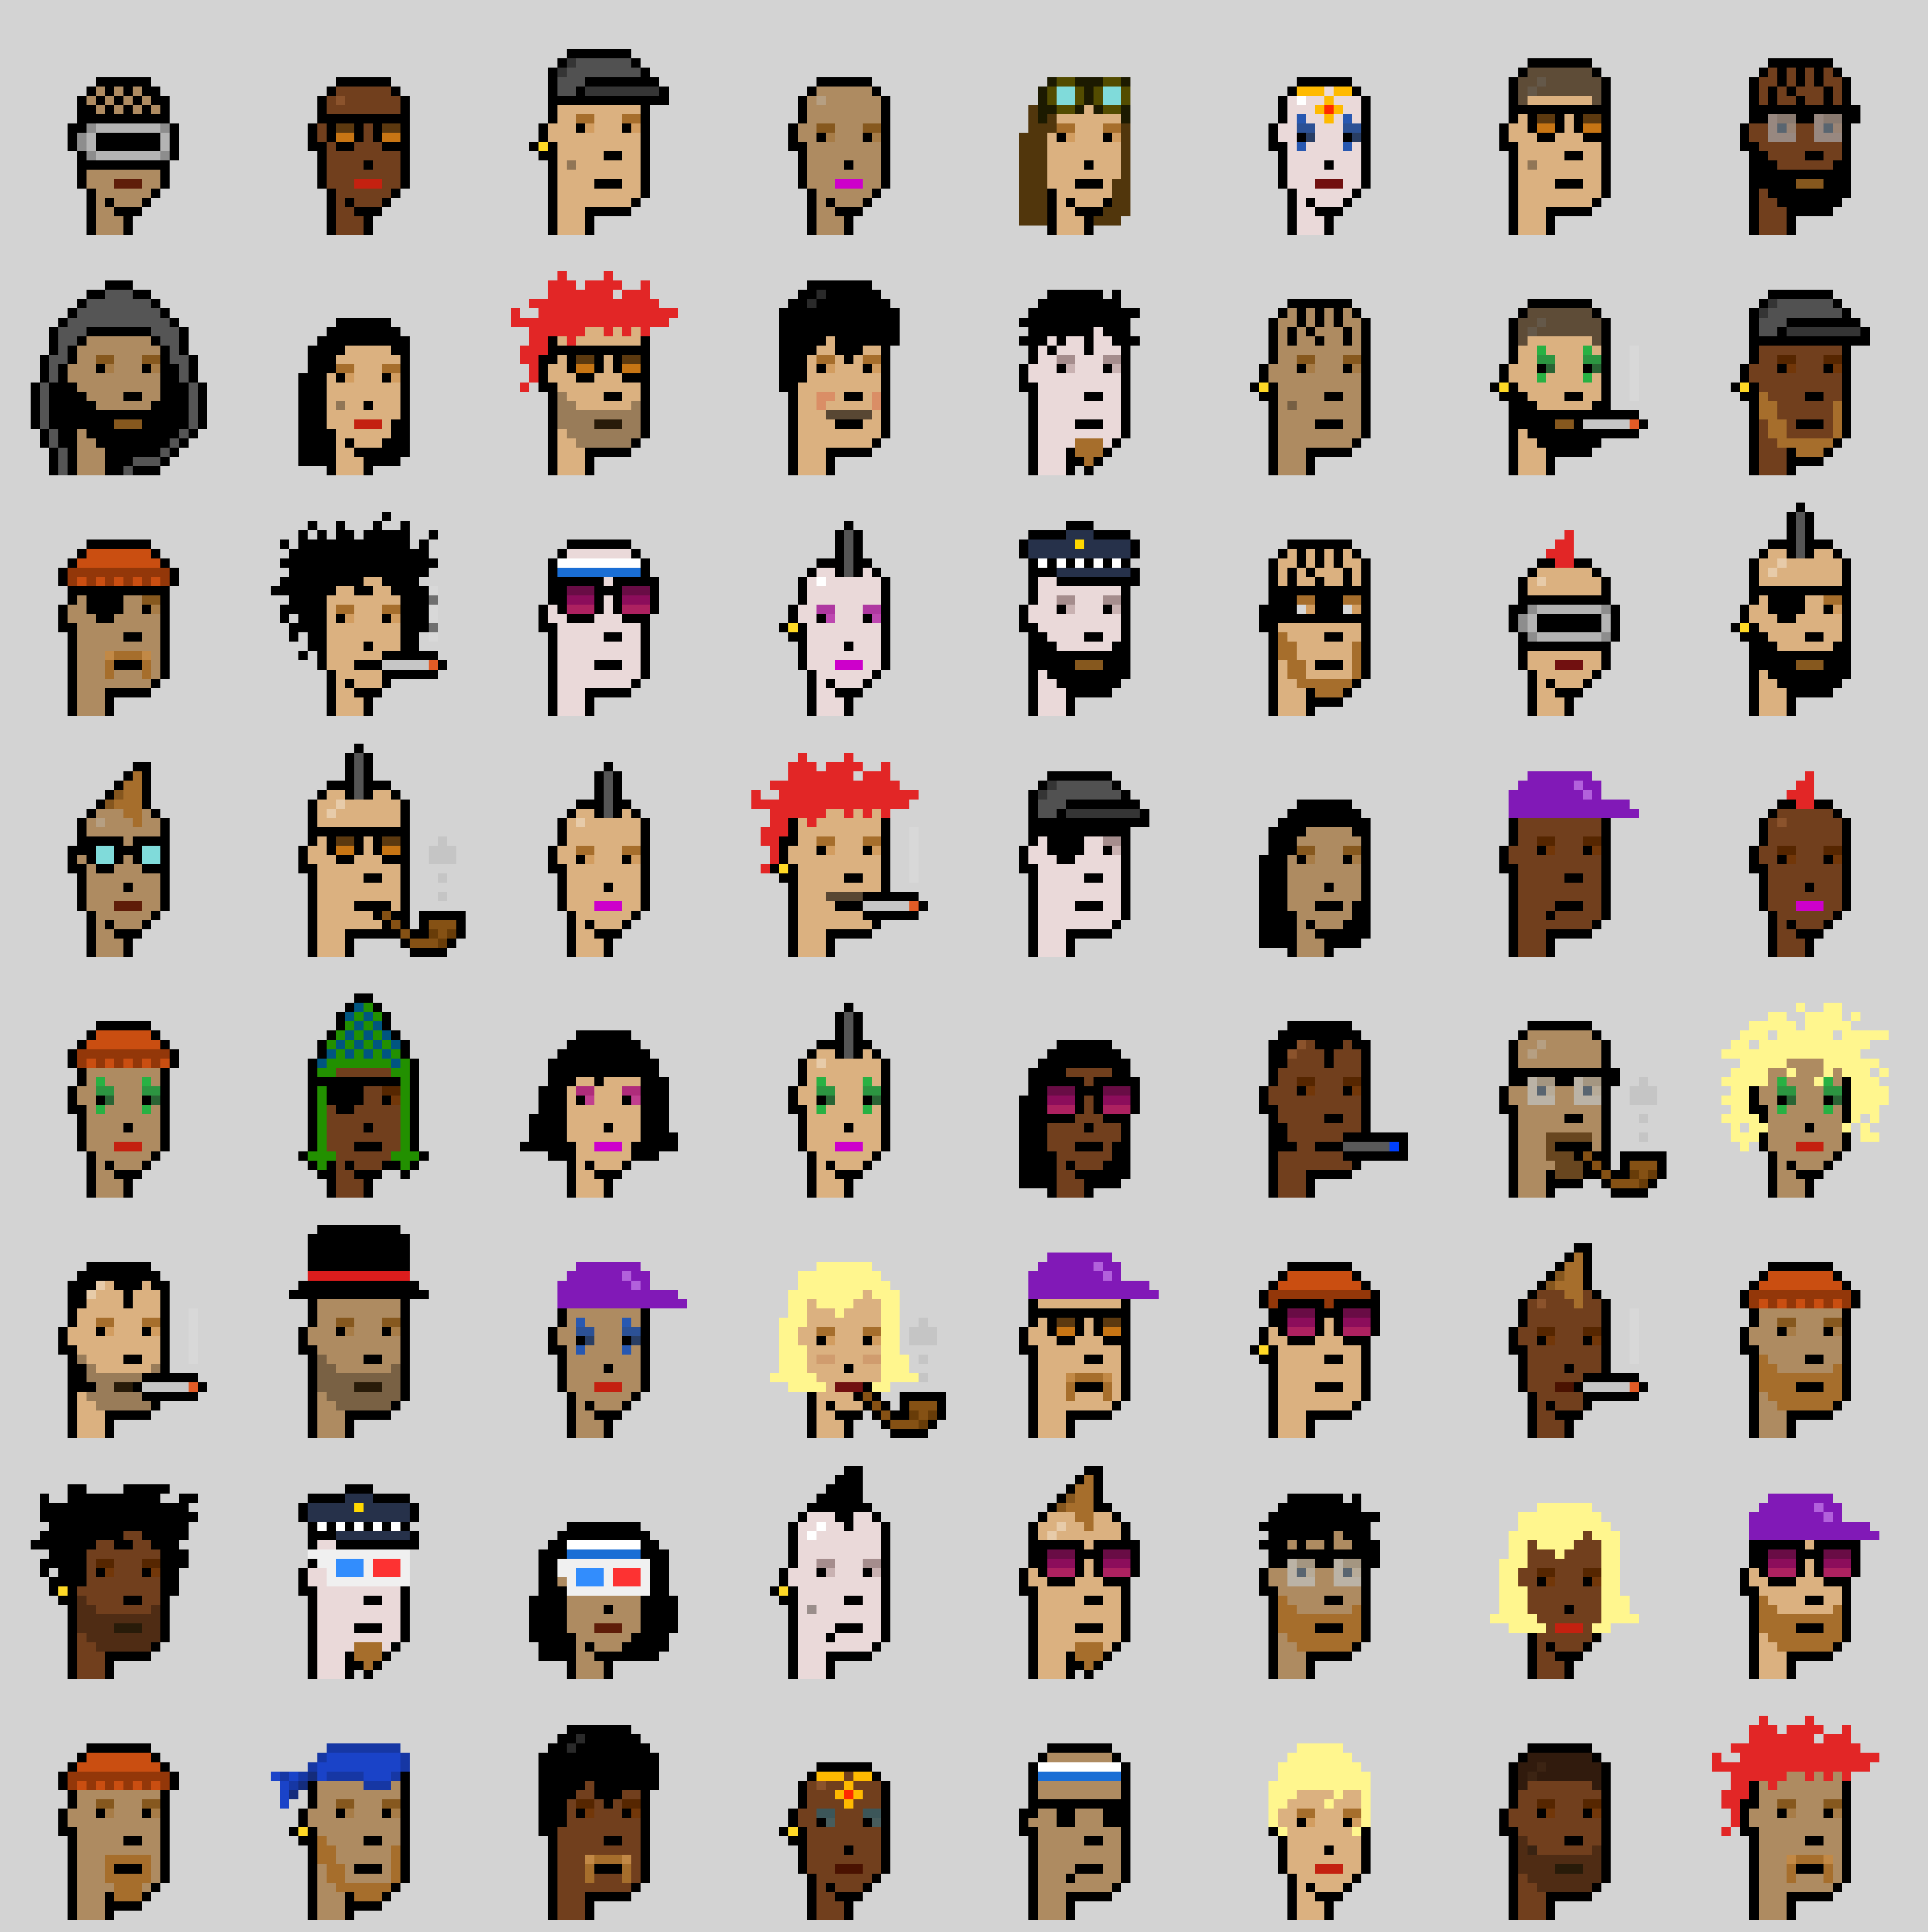

In [25]:
def plot_random_faces():
    # Load all 10000 images
    faces = load_images(10000)

    # Select N random images
    choices = np.random.choice(faces.shape[-1],N, replace = False)
    faces = faces[:,:,:,choices]

    # Check that the shape is correct
    print(faces.shape)

    # Example of plotting 8 times 8 images stored in "faces" and saving the output to a file named "punks.png"
    plotimgs(faces, 8, filename="punks.png")
plot_random_faces()

## 2b
Jeg har funnet ut at det er raskere å hente bildedata fra en npz fil vs loadimages, så jeg gjør det


In [34]:
def generate_face_data():
    '''
    This funtion loads all images to numpy arrays and saves them to a selection of smaller arrays. This
    is to reduce runtime while testing the upcomming calculations.
    '''
    # Load all 10000 images
    faces = load_images(10000)

    # Select 500 random images
    N = 500
    choices = np.random.choice(faces.shape[-1],N, replace = False)
    faces_500 = faces[:,:,:,choices]
    assert (faces_500.shape == (24, 24, 4, 500))  # Make shure the dimensions are correct
    
    # Select 100 random images
    N = 100
    choices = np.random.choice(faces.shape[-1],N, replace = False)
    faces_100 = faces[:,:,:,choices]
    assert (faces_100.shape == (24, 24, 4, 100))  # Make shure the dimensions are correct

    
    np.savez(
        'faces',
        faces = faces,
        faces_500 = faces_500,
        faces_100 = faces_100
    )
# generate_face_data()